In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 10)
import warnings
warnings.filterwarnings('ignore')

In [6]:
iris = load_iris()
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df["target"] = iris["target"]
df = df.drop(["petal width (cm)", "sepal width (cm)"], axis = 1)


In [7]:
from sklearn.model_selection import train_test_split
# 把資料分成兩部分 (1. 訓練資料 2. 測試資料)
data = df.drop(["target"], axis = 1)
data_train, data_test, target_train, target_test = train_test_split(data,df['target'],test_size=0.1)

In [13]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf = clf.fit(data_train, target_train)

In [9]:
from sklearn.metrics import accuracy_score
predict = clf.predict(data_test)
print("預測:", list(predict))
print("正確標籤:", list(target_test))
print("正確率: ", accuracy_score(target_test, predict) * 100, "%")

預測: [0, 1, 2, 2, 2, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1]
正確標籤: [0, 1, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 1]
正確率:  80.0 %


In [10]:
proba = pd.DataFrame(clf.predict_proba(data_test))
pd.DataFrame(proba)

,0,1,2
0,0.816009,0.182881,0.001110
1,0.028024,0.507831,0.464146
2,0.013797,0.452757,0.533446
3,0.014335,0.459715,0.525950
4,0.003307,0.359452,0.637241
5,0.082972,0.598443,0.318584
6,0.807562,0.191071,0.001367
7,0.039613,0.534766,0.425621
8,0.864528,0.135234,0.000238
9,0.083237,0.626129,0.290634


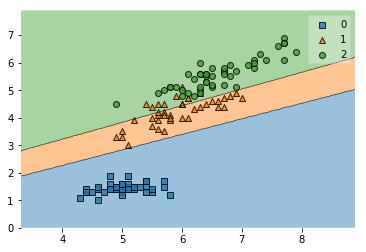

In [12]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
plot_decision_regions(X=np.array(data_train),
                      y=np.array(target_train),
                      clf=clf)

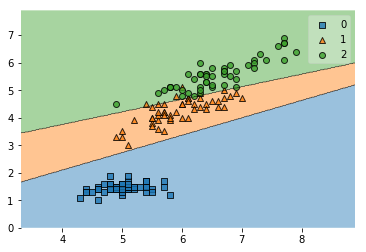

In [15]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
clf = LinearSVC()
clf = clf.fit(df.drop(["target"], axis = 1), df["target"])
plot_decision_regions(X=np.array(df.drop(["target"], axis = 1)),y=np.array(df["target"]),clf=clf)

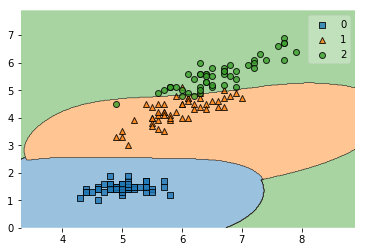

In [16]:
from sklearn.svm import SVC
clf = SVC(kernel="rbf")
clf = clf.fit(df.drop(["target"], axis = 1), df["target"])
plot_decision_regions(X=np.array(df.drop(["target"], axis = 1)),
y=np.array(df["target"]),
clf=clf)